# 분석 2주차 과제

# 1. LinearRegression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

In [3]:
# 데이터 확인
df.head()

,X,Y
0,1,1
1,2,7
2,3,5
3,4,8
4,5,10


**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] : y=1.78+1.01x

In [4]:
# 모델 생성 후 학습시키기
linear_reg = LinearRegression()
linear_reg.fit(df['X'].values.reshape(-1,1),df['Y'].values.reshape(-1,1))

LinearRegression()

In [5]:
# 회귀계수 구해보기
linear_reg.coef_

array([[1.01278195]])

In [6]:
# 상수항 구해보기
linear_reg.intercept_

array([2.01578947])

**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

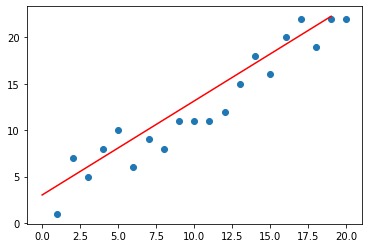

In [7]:
# X data에 대해 예측
pred = linear_reg.predict(np.array(X).reshape(-1,1))
# 점(학습데이터)들 찍어보기
plt.scatter(df['X'],df['Y'])
# 회귀직선 그려보기
plt.plot(pred,color='red')
plt.show()

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [8]:
# 여기에 구해보세요!
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Y'],pred)
print(mse)

3.1220676691729325


# Logistic Regression

In [9]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [10]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [11]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [13]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
mean_col = []
for i in df.columns:
    if i.split('_')[0] == 'mean':
        mean_col.append(i)
    else: continue
X = df[mean_col]
y = df['label']

In [14]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

Text(0.5, 1, 'Heatmap of all the Features')

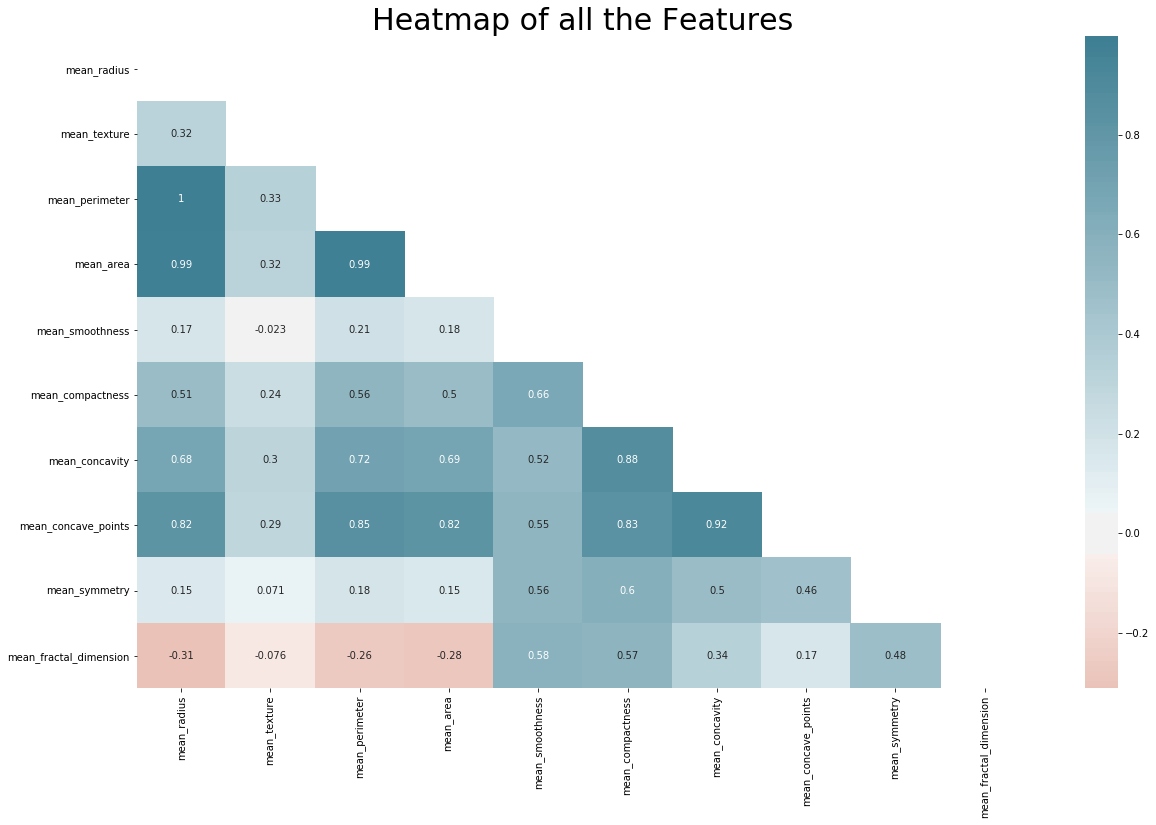

In [15]:
# heatmap을 통해 상관관계 확인
plt.figure(figsize=(20,12))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, mask=mask); 
plt.title("Heatmap of all the Features", fontsize = 30)

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**

[답] : 

- mean_radius,mean_area,mean_perimeter,mean_concavity,mean_concave_points

- 상관관계가 큰 변수가 서로에게 주는 영향력이 커서 다른 변수의 영향력을 계산하지 못함

**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

In [16]:
from sklearn.model_selection import train_test_split
X = df[['mean_radius','mean_area','mean_perimeter']]
Y = df['label']
# 학습 데이터와 테스트 데이터 분할
X_tr,X_te,Y_tr,Y_te = train_test_split(X,Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [17]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()
logit_reg.fit(X_tr,Y_tr)
pred = logit_reg.predict(X_te)
pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_te,pred)

array([[ 48,  15],
       [  8, 100]], dtype=int64)

In [19]:
# accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_te,pred))
print((100+48)/(100+48+15+8))

0.8654970760233918
0.8654970760233918


In [20]:
# precision
from sklearn.metrics import precision_score
print(precision_score(Y_te,pred))
print(100/(100+15))

0.8695652173913043
0.8695652173913043


In [21]:
# recall
from sklearn.metrics import recall_score
print(recall_score(Y_te,pred))
print(100/(100+8))

0.9259259259259259
0.9259259259259259


**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답]: 

### mean_area

- logit 관점 : mean_area가 1단위 증가할 때 logit 값이 -0.02132372 증가한다
- odds 관점 : mean_area가 1단위 증가할 때 확률이 0.97890202배 증가한다

### mean_perimeter

- logit 관점 : mean_perimeter가 1단위 증가할 때 logit 값이 -0.45512431 증가한다.
- odds 관점 : mean_perimeter가 1단위 증가할 때 확률이 0.6343691 증가한다.

In [22]:
# 로지스틱 회귀의 회귀계수
logit_reg.coef_

array([[ 3.89706532, -0.02132372, -0.45512431]])

In [23]:
np.exp(logit_reg.coef_)

array([[49.25768128,  0.97890202,  0.6343691 ]])

In [24]:
logit_reg.intercept_

array([0.65278918])

### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [26]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [27]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
minmax = scale.fit_transform(iris_df)
minmax_df = pd.DataFrame(minmax,columns=iris_df.columns)

In [28]:
print('feature 평균')
print(minmax_df.mean())
print('\n')
print('feature 분산')
print(minmax_df.var())

feature 평균
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64


feature 분산
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
stand = scale.fit_transform(iris_df)
stand_df = pd.DataFrame(stand,columns = iris_df.columns)

In [30]:
print('feature 평균')
print(stand_df.mean())
print('\n')
print('feature 분산')
print(stand_df.var())

feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

### normalization

- 정규화로 상대적 크기에 대한 영향을 줄이기 위한 scaling
- 데이터 군 내에서 특정 데이터가 가지는 위치 파악하기 용이

### standardization

- 표준화로 평균으로부터 얼마나 떨어져 있는지 나타냄. 
- 특정 범위를 벗어난 데이터는 이상치로 간주

## - Regularization

In [31]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [32]:
boston_df['price'] = boston_price
train,test = train_test_split(boston_df,test_size=.2,random_state=42)
train_x = train.drop('price',axis=1)
train_y = train['price']
test_x = test.drop('price',axis=1)
test_y = test['price']

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [33]:
linear = LinearRegression()
linear.fit(train_x,train_y)
pred = linear.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y,pred))
print('RMSE : %.2f'%rmse)

RMSE : 4.93


In [34]:
#Lasso
lasso = Lasso()
lasso.fit(train_x,train_y)
pred = lasso.predict(test_x)
lasso_rmse = np.sqrt(mean_squared_error(test_y,pred))
print('RMSE : %.2f'%lasso_rmse)

RMSE : 4.94


In [35]:
#Ridge
ridge = Ridge()
ridge.fit(train_x,train_y)
pred = ridge.predict(test_x)
ridge_rmse = np.sqrt(mean_squared_error(test_y,pred))
print('RMSE : %.2f'%ridge_rmse)

RMSE : 4.95


In [36]:
def show_height(ax,fontsize=10):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=fontsize)

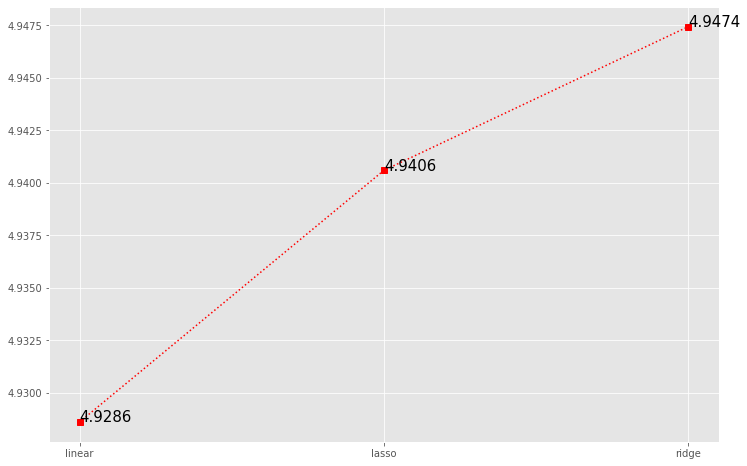

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.plot(['linear','lasso','ridge'],[rmse,lasso_rmse,ridge_rmse],'rs:')
for i,j in zip(['linear','lasso','ridge'],[rmse,lasso_rmse,ridge_rmse]):
    plt.text(i, j, '%.4f'%j,fontsize=15)

# 수고하셨습니다 :D